<h1>Advanced Level Task</h1>
<h2>Task 8: Next Word Prediction</h2>

<b>Name: Sumant Pujari</b>

# Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Load Dataset(text file) from Drive

In [ ]:
# open the utf-8 encoded text file and convert the text into lowercase
data = open('/content/drive/MyDrive/Data_Science/Datasets/NextWord/1661-0.txt',encoding = "utf8").read().lower()
# Check length of text
len(data)

581888

In [ ]:
data

'\ufeff\nproject gutenberg\'s the adventures of sherlock holmes, by arthur conan doyle\n\nthis ebook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  you may copy it, give it away or\nre-use it under the terms of the project gutenberg license included\nwith this ebook or online at www.gutenberg.net\n\n\ntitle: the adventures of sherlock holmes\n\nauthor: arthur conan doyle\n\nrelease date: november 29, 2002 [ebook #1661]\nlast updated: may 20, 2019\n\nlanguage: english\n\ncharacter set encoding: utf-8\n\n*** start of this project gutenberg ebook the adventures of sherlock holmes ***\n\n\n\nproduced by an anonymous project gutenberg volunteer and jose menendez\n\n\n\ncover\n\n\n\nthe adventures of sherlock holmes\n\n\n\nby arthur conan doyle\n\n\n\ncontents\n\n\n   i.     a scandal in bohemia\n   ii.    the red-headed league\n   iii.   a case of identity\n   iv.    the boscombe valley mystery\n   v.     the five orange pips\n   vi.    the man wi

In [ ]:
# Convert list into string
data=str(data)

# Pre-processing Data

In [ ]:
# Using regular expression remove unnecessary characters from the data
import re
data = re.sub(r"[^a-zA-Z0-9\n',.]"," ",data)
data = " ".join(data.split())
print(data)

project gutenberg's the adventures of sherlock holmes, by arthur conan doyle this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. you may copy it, give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www.gutenberg.net title the adventures of sherlock holmes author arthur conan doyle release date november 29, 2002 ebook 1661 last updated may 20, 2019 language english character set encoding utf 8 start of this project gutenberg ebook the adventures of sherlock holmes produced by an anonymous project gutenberg volunteer and jose menendez cover the adventures of sherlock holmes by arthur conan doyle contents i. a scandal in bohemia ii. the red headed league iii. a case of identity iv. the boscombe valley mystery v. the five orange pips vi. the man with the twisted lip vii. the adventure of the blue carbuncle viii. the adventure of the speckled band ix. the adventure of the engineer s 

In [ ]:
# Convert the large text file into list of sentences ie. corpus
corpus = data.lower().split('.')
corpus

["project gutenberg's the adventures of sherlock holmes, by arthur conan doyle this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever",
 ' you may copy it, give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www',
 'gutenberg',
 'net title the adventures of sherlock holmes author arthur conan doyle release date november 29, 2002 ebook 1661 last updated may 20, 2019 language english character set encoding utf 8 start of this project gutenberg ebook the adventures of sherlock holmes produced by an anonymous project gutenberg volunteer and jose menendez cover the adventures of sherlock holmes by arthur conan doyle contents i',
 ' a scandal in bohemia ii',
 ' the red headed league iii',
 ' a case of identity iv',
 ' the boscombe valley mystery v',
 ' the five orange pips vi',
 ' the man with the twisted lip vii',
 ' the adventure of the blue carbuncle viii',
 ' the adventure of the spec

# Explore the dataset

In [ ]:
# Size of Corpus
len(corpus)

6434

In [ ]:
type(corpus)

list

In [ ]:
# Print random corpus
corpus[7]

' the boscombe valley mystery v'

# Tokenize each unique word

In [ ]:
# Using Keras Tokenizer tokenize the corpus words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
total_unique_words = len(tokenizer.word_index) + 1 
print(total_unique_words)
print(word_index)

8176
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'of': 5, 'a': 6, 'in': 7, 'that': 8, 'it': 9, 'you': 10, 'he': 11, 'was': 12, 'his': 13, 'is': 14, 'my': 15, 'have': 16, 'with': 17, 'as': 18, 'had': 19, 'at': 20, 'which': 21, 'for': 22, 'not': 23, 'but': 24, 'be': 25, 'me': 26, 'we': 27, 'this': 28, 'there': 29, 'from': 30, 'said': 31, 'holmes': 32, 'upon': 33, 'so': 34, 'him': 35, 'her': 36, 'she': 37, 'all': 38, 'your': 39, 'very': 40, 'no': 41, 'been': 42, 'on': 43, 'what': 44, 's': 45, 'one': 46, 'by': 47, 'then': 48, 'are': 49, 'were': 50, 'an': 51, 'would': 52, 'out': 53, 'when': 54, 'man': 55, 'up': 56, 'do': 57, 'could': 58, 'has': 59, 'if': 60, 'or': 61, 'into': 62, 'mr': 63, 'who': 64, 'will': 65, 'little': 66, 'some': 67, 'now': 68, 'see': 69, 'down': 70, 'may': 71, 'our': 72, 'should': 73, 'they': 74, 'well': 75, 'can': 76, 'am': 77, 'us': 78, 'over': 79, 'about': 80, 'more': 81, 'think': 82, 'must': 83, 'know': 84, 'room': 85, 'shall': 86, 'before': 87, 'any': 88, 'only': 89, 'o

In [ ]:
# create a list of tokens for each line
seqs=[]
for line in corpus:
   seqs.append(tokenizer.texts_to_sequences([line])[0])
   
print(seqs)

[[143, 4577, 1, 986, 5, 126, 32, 47, 478, 2142, 2143, 28, 987, 14, 22, 1, 268, 5, 389, 2144, 20, 41, 1611, 2, 17, 571, 41, 3271, 3272], [10, 71, 801, 9, 204, 9, 118, 61, 1288, 268, 9, 257, 1, 479, 5, 1, 143, 129, 642, 2145, 17, 28, 987, 61, 2146, 20, 1061], [129], [3273, 2558, 1, 986, 5, 126, 32, 4578, 478, 2142, 2143, 4579, 988, 4580, 4581, 4582, 987, 2147, 136, 3274, 71, 3275, 4583, 3276, 1062, 548, 238, 4584, 4585, 1410, 704, 5, 28, 143, 129, 987, 1, 986, 5, 126, 32, 1847, 47, 51, 3277, 143, 129, 2559, 2, 3278, 3279, 1612, 1, 986, 5, 126, 32, 47, 478, 2142, 2143, 1848, 3], [6, 859, 7, 907, 2560], [1, 242, 480, 676, 2561], [6, 115, 5, 2148, 3280], [1, 705, 1411, 518, 3281], [1, 303, 989, 908, 3282], [1, 55, 17, 1, 1063, 909, 3283], [1, 603, 5, 1, 449, 1412, 3284], [1, 603, 5, 1, 1849, 752, 3285], [1, 603, 5, 1, 1163, 45, 677, 3286], [1, 603, 5, 1, 802, 1289, 3287], [1, 603, 5, 1, 2149, 409, 3288], [1, 603, 5, 1, 860, 910, 3], [6, 859, 7, 907, 3], [4, 126, 32, 37, 14, 221, 1, 188], [3

In [ ]:
# Tokenize each snippet in our line
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)): 
    n_gram_seqs = token_list[:i+1]
    input_sequences.append(n_gram_seqs)
print('Length of input sequences',len(input_sequences))
# first 5 input sequences
print(input_sequences[:5])

Length of input sequences 102815
[[143, 4577], [143, 4577, 1], [143, 4577, 1, 986], [143, 4577, 1, 986, 5], [143, 4577, 1, 986, 5, 126]]


In [ ]:
# Padding zero to smaller matrices to match the size of Largest Matrix
max_seq_length = max([len(x) for x in input_sequences])
input_seqs = np.array(pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre'))
print(max_seq_length)
print(input_seqs[:5])

105
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  143 4577]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 

In [ ]:
# Split data into X and y sets
X_train, labels = input_seqs[:, :-1], input_seqs[:, -1]
y_train = tf.keras.utils.to_categorical(labels, num_classes=total_unique_words)
print(X_train[:3])
print(labels[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  143]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0

In [ ]:
# Print tokens of similar words to understand its behaviour
print(tokenizer.word_index['good'])
print(tokenizer.word_index['great'])

102
219


# Add a Pre-Trained Word Embedding Model GloVe  

In [ ]:
# Add 100-dimensional GloVe embeddings
path = '/content/drive/MyDrive/Data_Science/Datasets/NextWord/glove.6B.100d.txt'
embeddings_index = {}
with open(path) as f:
  for line in f:
    values = line.split()
    word = values[0]
    coeffs = np.array(values[1:], dtype='float32')
    embeddings_index[word] = coeffs
dict(list(embeddings_index.items())[0:2])

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [ ]:
# Build a corresponding model to hold the embeddings
embeddings_matrix = np.zeros((total_unique_words, 100))
for word, i in word_index.items():
   embedding_vector = embeddings_index.get(word)
   if embedding_vector is not None:
     embeddings_matrix[i] = embedding_vector;

# Build a Deep Learning Model

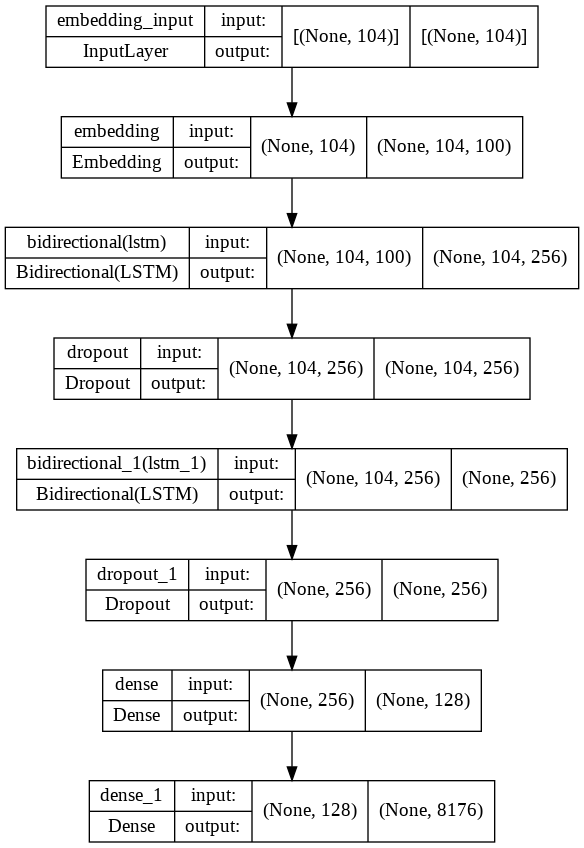

In [ ]:
model = Sequential([
Embedding(input_dim = total_unique_words, output_dim=100, weights=[embeddings_matrix], input_length=max_seq_length-1, trainable=False),
Bidirectional(LSTM(128, return_sequences=True)),
tf.keras.layers.Dropout(0.2),
Bidirectional(LSTM(128)),
tf.keras.layers.Dropout(0.2),
Dense(128, activation='relu'),
Dense(total_unique_words , activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# return a model visual representation
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# return model description
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 104, 100)          817600    
                                                                 
 bidirectional (Bidirectiona  (None, 104, 256)         234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 104, 256)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

# Train the Deep Learning Model

In [ ]:
# Increase epoch to 50 and batch size to 256 for better accuracy
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1, batch_size=128)

Epoch 1/10
643/643 [==============================] - 1132s 2s/step - loss: 6.3159 - accuracy: 0.0766 - val_loss: 6.2488 - val_accuracy: 0.0959
Epoch 2/10
643/643 [==============================] - 1139s 2s/step - loss: 5.7509 - accuracy: 0.1096 - val_loss: 6.1610 - val_accuracy: 0.1124
Epoch 3/10
643/643 [==============================] - 1130s 2s/step - loss: 5.5240 - accuracy: 0.1203 - val_loss: 6.1430 - val_accuracy: 0.1224
Epoch 4/10
643/643 [==============================] - 1132s 2s/step - loss: 5.3791 - accuracy: 0.1254 - val_loss: 6.1248 - val_accuracy: 0.1239
Epoch 5/10
643/643 [==============================] - 1135s 2s/step - loss: 5.2838 - accuracy: 0.1294 - val_loss: 6.1850 - val_accuracy: 0.1251
Epoch 6/10
643/643 [==============================] - 1137s 2s/step - loss: 5.2034 - accuracy: 0.1330 - val_loss: 6.2115 - val_accuracy: 0.1276
Epoch 7/10
643/643 [==============================] - 1132s 2s/step - loss: 5.1361 - accuracy: 0.1357 - val_loss: 6.2727 - val_accuracy:

In [ ]:
# Save the Model
model.save('NextWordModel.h5')

# Test the Deep Learning Model

In [ ]:
# Load Model
model = tf.keras.models.load_model('NextWordModel.h5')

In [ ]:
# Evaluate the current model accuracy and loss
loss_and_acc=model.evaluate(X_train,y_train)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

3213/3213 [==============================] - 527s 163ms/step - loss: 5.1768 - accuracy: 0.1396
Test Loss 5.176846027374268
Test Accuracy 0.13962943851947784


In [ ]:
# Prediction function which will be used to test the model

# parameters will be the seed and the number of words to predict
def prediction(seed, next_words): 
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=1), axis=-1)
    
    ouput_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        seed += ' '+output_word
  print(seed)

In [ ]:
# Model test using user inputs
for i in range(1,4):
  print('Your {} Prediction:'.format(i))
  seed = input('Enter your seed text: ')
  next_words = int(input('Enter number words to be predicted: '))
  prediction(seed, next_words)
  print()

Your 1 Prediction:
Enter your seed text: Do you believe in god
Enter number words to be predicted: 5
1/1 [==============================] - 0s 37ms/step
Do you believe in god to be a very man

Your 2 Prediction:
Enter your seed text: Knowledge is power to do
Enter number words to be predicted: 4
1/1 [==============================] - 0s 44ms/step
Knowledge is power to do that i have not

Your 3 Prediction:
Enter your seed text: Best of luck for your
Enter number words to be predicted: 2
1/1 [==============================] - 0s 48ms/step
Best of luck for your own face



<b>Conclusion :
1. Deep learning model is successfully created to predicted next n words using the seed text.
2. The Model Accuracy is around 14%, it can be increased by increasing batch size and epochs.